In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())
print(df.tail())
print(df.columns)
print(df.dtypes)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
     Country  Year  Life expectancy at birth (years)           GDP
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
Country                              object
Year                                  int64
Life expectancy at birth (years)    floa

In our dataframe we have four columns: Country, Year, Life expectancy, GDP. 
These all appear to be in the appropriate data type so no clean up is needed on this front.

In [3]:
df.rename(columns={'Life expectancy at birth (years)': 'Life Exp'}, inplace=True)
print(df.head(20))

   Country  Year  Life Exp           GDP
0    Chile  2000      77.3  7.786093e+10
1    Chile  2001      77.3  7.097992e+10
2    Chile  2002      77.8  6.973681e+10
3    Chile  2003      77.9  7.564346e+10
4    Chile  2004      78.0  9.921039e+10
5    Chile  2005      78.4  1.229650e+11
6    Chile  2006      78.9  1.547880e+11
7    Chile  2007      78.9  1.736060e+11
8    Chile  2008      79.6  1.796380e+11
9    Chile  2009      79.3  1.723890e+11
10   Chile  2010      79.1  2.185380e+11
11   Chile  2011      79.8  2.522520e+11
12   Chile  2012      79.9  2.671220e+11
13   Chile  2013      80.1  2.783840e+11
14   Chile  2014      80.3  2.609900e+11
15   Chile  2015      80.5  2.425180e+11
16   China  2000      71.7  1.211350e+12
17   China  2001      72.2  1.339400e+12
18   China  2002      72.7  1.470550e+12
19   China  2003      73.1  1.660290e+12


In [4]:
print(np.mean(df['Life Exp']))

72.78958333333334


72.8 is the global average Life Expectancy

In [5]:
print(np.mean(df['GDP']))

3880498570768.396


3.9 Trillion (3.9e+12) is the global average GDP

In [6]:
print(df['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


This dataframe is tracking information for the years 2000-2015

In [7]:
print(len(df))

96


In [8]:
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


This dataframe is only tracking the information for the 6 countries listed above.

Ok so let's build out some data. I want to explore if there is a relationship between GDP and life expectancy. If there are variations can this be explained by geography? Industrialized vs neo-colonial world?

In [9]:
Chile_df = df[df['Country'] == 'Chile']
print(Chile_df.head())

  Country  Year  Life Exp           GDP
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10


In [10]:
Germany_df = df[df['Country'] == 'Germany']
Mexico_df = df[df['Country'] == 'Mexico']
US_df = df[df['Country'] == 'United States of America']
Zimbabwe_df = df[df['Country'] == 'Zimbabwe']
China_df = df[df['Country'] == 'China']

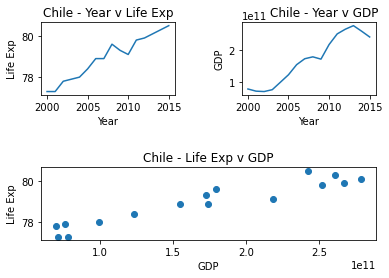

<Figure size 432x288 with 0 Axes>

In [79]:
ax1 = plt.subplot(2,2,1)
ax1.plot(Chile_df['Year'], Chile_df['Life Exp'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Exp')
ax1.set_title('Chile - Year v Life Exp')
ax2 = plt.subplot(2,2,2)
ax2.plot(Chile_df['Year'], Chile_df['GDP'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('        Chile - Year v GDP')
ax3 = plt.subplot(2,1,2)
ax3.scatter(Chile_df['GDP'], Chile_df['Life Exp'])
ax3.set_xlabel('GDP')
ax3.set_ylabel('Life Exp')
ax3.set_title('Chile - Life Exp v GDP')
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=.5)
plt.savefig('Chile_3.png')
plt.show()
plt.clf()

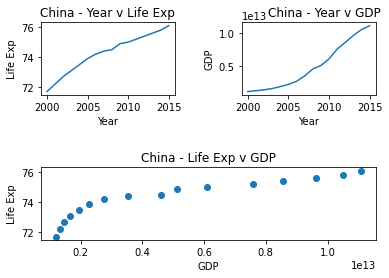

<Figure size 432x288 with 0 Axes>

In [80]:
ax1 = plt.subplot(2,2,1)
ax1.plot(China_df['Year'], China_df['Life Exp'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Exp')
ax1.set_title('China - Year v Life Exp')
ax2 = plt.subplot(2,2,2)
ax2.plot(China_df['Year'], China_df['GDP'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('        China - Year v GDP')
ax3 = plt.subplot(2,1,2)
ax3.scatter(China_df['GDP'], China_df['Life Exp'])
ax3.set_xlabel('GDP')
ax3.set_ylabel('Life Exp')
ax3.set_title('China - Life Exp v GDP')
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=.5)
plt.savefig('China_3.png')
plt.show()
plt.clf()

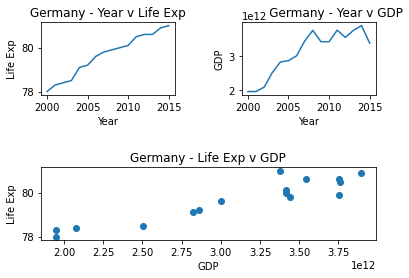

<Figure size 432x288 with 0 Axes>

In [81]:
ax1 = plt.subplot(2,2,1)
ax1.plot(Germany_df['Year'], Germany_df['Life Exp'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Exp')
ax1.set_title('Germany - Year v Life Exp')
ax2 = plt.subplot(2,2,2)
ax2.plot(Germany_df['Year'], Germany_df['GDP'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('              Germany - Year v GDP')
ax3 = plt.subplot(2,1,2)
ax3.scatter(Germany_df['GDP'], Germany_df['Life Exp'])
ax3.set_xlabel('GDP')
ax3.set_ylabel('Life Exp')
ax3.set_title('Germany - Life Exp v GDP')
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=.5)
plt.savefig('Germany_3.png')
plt.show()
plt.clf()

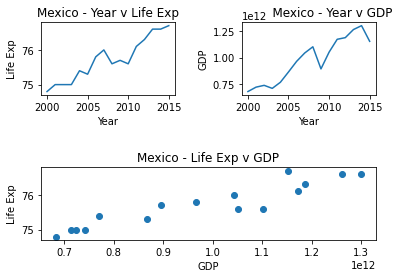

<Figure size 432x288 with 0 Axes>

In [82]:
ax1 = plt.subplot(2,2,1)
ax1.plot(Mexico_df['Year'], Mexico_df['Life Exp'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Exp')
ax1.set_title('Mexico - Year v Life Exp')
ax2 = plt.subplot(2,2,2)
ax2.plot(Mexico_df['Year'], Mexico_df['GDP'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('            Mexico - Year v GDP')
ax3 = plt.subplot(2,1,2)
ax3.scatter(Mexico_df['GDP'], Mexico_df['Life Exp'])
ax3.set_xlabel('GDP')
ax3.set_ylabel('Life Exp')
ax3.set_title('Mexico - Life Exp v GDP')
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=.5)
plt.savefig('Mexico_3.png')
plt.show()
plt.clf()

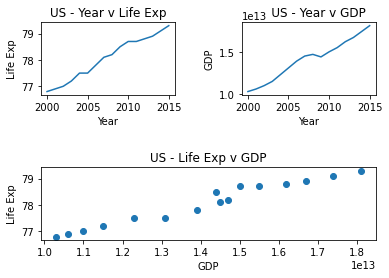

<Figure size 432x288 with 0 Axes>

In [83]:
ax1 = plt.subplot(2,2,1)
ax1.plot(US_df['Year'], US_df['Life Exp'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Exp')
ax1.set_title('US - Year v Life Exp')
ax2 = plt.subplot(2,2,2)
ax2.plot(US_df['Year'], US_df['GDP'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('     US - Year v GDP')
ax3 = plt.subplot(2,1,2)
ax3.scatter(US_df['GDP'], US_df['Life Exp'])
ax3.set_xlabel('GDP')
ax3.set_ylabel('Life Exp')
ax3.set_title('US - Life Exp v GDP')
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=.5)
plt.savefig('US_3.png')
plt.show()
plt.clf()

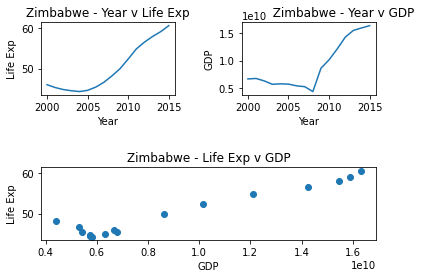

<Figure size 432x288 with 0 Axes>

In [84]:
ax1 = plt.subplot(2,2,1)
ax1.plot(Zimbabwe_df['Year'], Zimbabwe_df['Life Exp'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Exp')
ax1.set_title('Zimbabwe - Year v Life Exp')
ax2 = plt.subplot(2,2,2)
ax2.plot(Zimbabwe_df['Year'], Zimbabwe_df['GDP'])
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.set_title('                  Zimbabwe - Year v GDP')
ax3 = plt.subplot(2,1,2)
ax3.scatter(Zimbabwe_df['GDP'], Zimbabwe_df['Life Exp'])
ax3.set_xlabel('GDP')
ax3.set_ylabel('Life Exp')
ax3.set_title('Zimbabwe - Life Exp v GDP')
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=.5)
plt.savefig('Zimbabwe_3.png')
plt.show()
plt.clf()

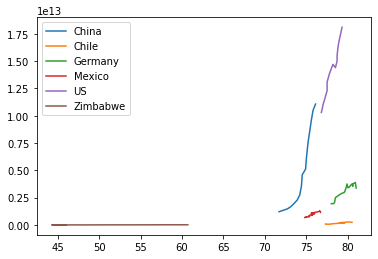

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(China_df['Life Exp'], China_df['GDP'])
plt.plot(Chile_df['Life Exp'], Chile_df['GDP'])
plt.plot(Germany_df['Life Exp'], Germany_df['GDP'])
plt.plot(Mexico_df['Life Exp'], Mexico_df['GDP'])
plt.plot(US_df['Life Exp'], US_df['GDP'])
plt.plot(Zimbabwe_df['Life Exp'], Zimbabwe_df['GDP'])
plt.legend(['China', 'Chile', 'Germany', 'Mexico', 'US', 'Zimbabwe'])
plt.show()
plt.clf()

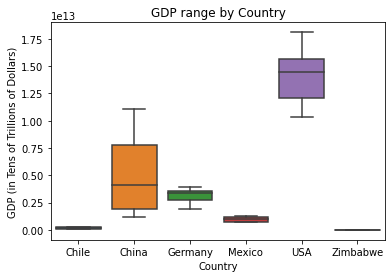

<Figure size 432x288 with 0 Axes>

In [91]:
ax = plt.subplot()
sns.boxplot(data=df, x = 'Country', y = 'GDP')
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.ylabel('GDP (in Tens of Trillions of Dollars)')
plt.title('GDP range by Country')
plt.savefig('GDP_Country.png')
plt.show()
plt.clf()

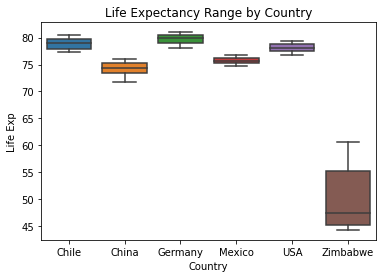

<Figure size 432x288 with 0 Axes>

In [71]:
ax = plt.subplot()
sns.boxplot(data=df, x = 'Country', y = 'Life Exp')
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.title('Life Expectancy Range by Country')
plt.savefig('LifeExp_Country.png')
plt.show()
plt.clf()

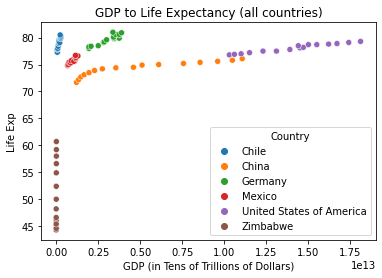

<Figure size 432x288 with 0 Axes>

In [88]:
sns.scatterplot(data=df, x='GDP', y='Life Exp', hue='Country')
plt.xlabel('GDP (in Tens of Trillions of Dollars)')
plt.title('GDP to Life Expectancy (all countries)')
plt.savefig('GDP_LifeExp_All.png')
plt.show()
plt.clf()

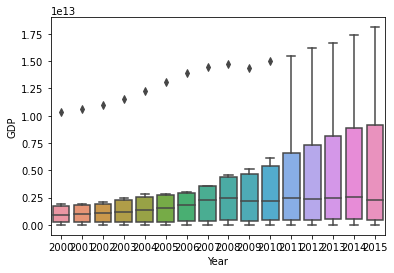

<Figure size 432x288 with 0 Axes>

In [74]:
sns.boxplot(data=df, x='Year', y='GDP')
plt.show()
plt.clf()

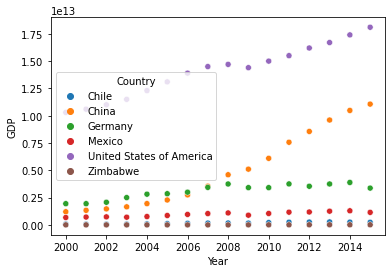

<Figure size 432x288 with 0 Axes>

In [22]:
sns.scatterplot(data=df, x='Year', y='GDP', hue='Country')
plt.show()
plt.clf()

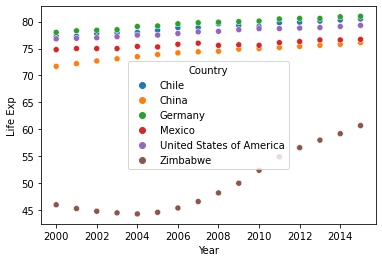

<Figure size 432x288 with 0 Axes>

In [23]:
sns.scatterplot(data=df, x='Year', y='Life Exp', hue='Country')
plt.show()
plt.clf()

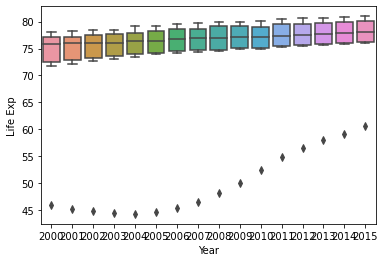

<Figure size 432x288 with 0 Axes>

In [24]:
sns.boxplot(data=df, x='Year', y='Life Exp')
plt.show()
plt.clf()

The US and Zimbabwe prove to be outliers and have the effect of skewing our data. I'm going to see what happens when they are filtered out.

In [98]:
new_GDP = df[(df['Country'] != 'United States of America') & (df['Country'] != 'China')]
new_LifeEx = df[df['Country'] != 'Zimbabwe']
the_middle = df[(df['Country'] != 'United States of America') & (df['Country'] != 'Zimbabwe')]

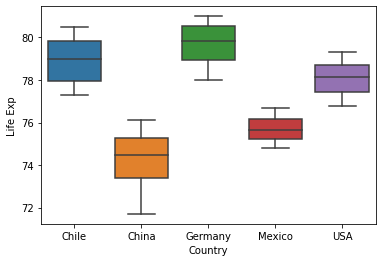

<Figure size 432x288 with 0 Axes>

In [103]:
ax = plt.subplot()
sns.boxplot(data=new_LifeEx, x='Country', y='Life Exp')
ax.set_xticklabels(['Chile','China','Germany', 'Mexico', 'USA'])
plt.savefig('LifeExp_Top5.png')
plt.show()
plt.clf()

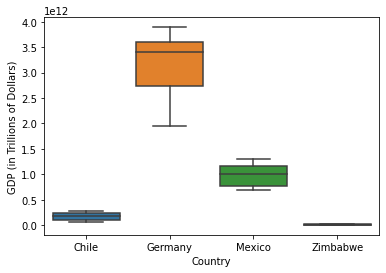

<Figure size 432x288 with 0 Axes>

In [105]:
sns.boxplot(data=new_GDP, x='Country', y='GDP')
plt.ylabel('GDP (in Trillions of Dollars)')
plt.savefig('GDP_Bottom4.png')
plt.show()
plt.clf()

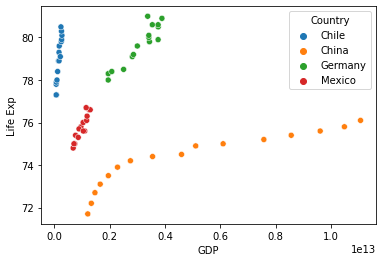

<Figure size 432x288 with 0 Axes>

In [28]:
sns.scatterplot(data=the_middle, x='GDP', y='Life Exp', hue='Country')
plt.show()
plt.clf()

In [29]:
GDP_bottom = df[df['GDP'] <= 0.2e13]
LifeExp_top = df[df['Life Exp'] >= 75]

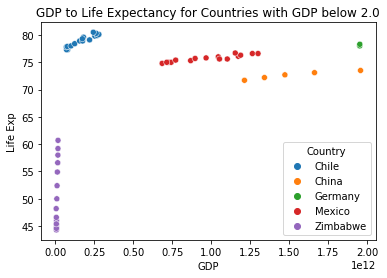

<Figure size 432x288 with 0 Axes>

In [30]:
sns.scatterplot(data=GDP_bottom, x='GDP', y='Life Exp', hue='Country')
plt.title('GDP to Life Expectancy for Countries with GDP below 2.0')
plt.show()
plt.clf()

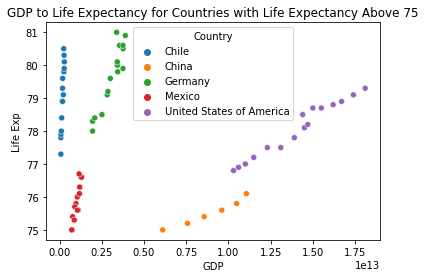

<Figure size 432x288 with 0 Axes>

In [31]:
sns.scatterplot(data=LifeExp_top, x='GDP', y='Life Exp', hue='Country')
plt.title('GDP to Life Expectancy for Countries with Life Expectancy Above 75')
plt.show()
plt.clf()

If we review each country in isolation we would come to the conclusion that generally there is a trent towards increased GDP and increased life expectancy over time. However, this conclusion is relative. Chile, Mexico and Germany all have relatively high life expectancy, roughly on par with or better than China and the US. This is true even as China and the US have greatly outpaced all the other countries in terms of GDP. Alternatively Zimbabwe has show comparatively little GDP growth, but the life expectancy has grown by more than 15 years over the period examined. All of this leads us to concluse that GDP is not the biggest determining factor when considering Life Expectancy.

Next I want to see if we can chart the significane of this data.

In [32]:
Chile = df['Life Exp'][df.Country == 'Chile']
China = df['Life Exp'][df.Country == 'China']
Germany = df['Life Exp'][df.Country == 'Germany']
Mexico = df['Life Exp'][df.Country == 'Mexico']
US = df['Life Exp'][df.Country == 'United States of America']
Zimbabwe = df['Life Exp'][df.Country == 'Zimbabwe']

fstat, pval = f_oneway(Chile, China, Germany, Mexico, US, Zimbabwe)
print(pval)

7.885135700050126e-55


In [33]:
tukey_results = pairwise_tukeyhsd(df['Life Exp'], df.Country, 0.05)
print(tukey_results)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                   group2          meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------
                   Chile                    China  -4.6812  0.001  -7.3453  -2.0172   True
                   Chile                  Germany   0.7125    0.9  -1.9516   3.3766  False
                   Chile                   Mexico   -3.225 0.0085  -5.8891  -0.5609   True
                   Chile United States of America  -0.8812    0.9  -3.5453   1.7828  False
                   Chile                 Zimbabwe   -28.85  0.001 -31.5141 -26.1859   True
                   China                  Germany   5.3938  0.001   2.7297   8.0578   True
                   China                   Mexico   1.4563 0.5921  -1.2078   4.1203  False
                   China United States of America      3.8  0.001   1.1359   6.4641   True

In [34]:
Chile2 = df['GDP'][df.Country == 'Chile']
China2 = df['GDP'][df.Country == 'China']
Germany2 = df['GDP'][df.Country == 'Germany']
Mexico2 = df['GDP'][df.Country == 'Mexico']
US2 = df['GDP'][df.Country == 'United States of America']
Zimbabwe2 = df['GDP'][df.Country == 'Zimbabwe']

fstat, pval = f_oneway(Chile2, China2, Germany2, Mexico2, US2, Zimbabwe2)
print(pval)

1.0177777153618003e-41


In [35]:
tukey_results2 = pairwise_tukeyhsd(df['GDP'], df.Country, 0.05)
print(tukey_results2)

                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                    
         group1                   group2                meandiff      p-adj         lower               upper        reject
---------------------------------------------------------------------------------------------------------------------------
                   Chile                    China  4787924904984.6875  0.001   2971784703971.257   6604065105998.118   True
                   Chile                  Germany  2924986779984.6875  0.001  1108846578971.2566   4741126980998.118   True
                   Chile                   Mexico   806861779984.6875 0.7616 -1009278421028.7434   2623001980998.118  False
                   Chile United States of America  13905211154984.688  0.001  12089070953971.256   15721351355998.12   True
                   Chile                 Zimbabwe    -160726265420.25    0.9  -1976866466433.681   1655413935593.181  False
        

The Tukey tests above note that there is a significant difference between the GDP comparisons of nearly all countries. The life expectancy comparisons how a significant difference as well, but not in the ways that we might have expected at the beginning of our analysis. The GDP's that are not showing as significantly different are Chile, Mexico and Zimbabwe. However these three countries have significant differences in their Life Expectancy. Meanwhile Germany, Chile, the US, China, Mexico do not show consistently signfificant differences from one another in terms of life expectency. They represent a consistent life expectency range, we also we this on our boxplot comparison of the five countries. However there are significant differences between nearly all of these pairing in terms of GDP, with the exception of Chile and Mexico.

As a result we must rule out national GDP as a significant indicator of national Life Expectancy.

The following tables should be saved and used for the blog post.

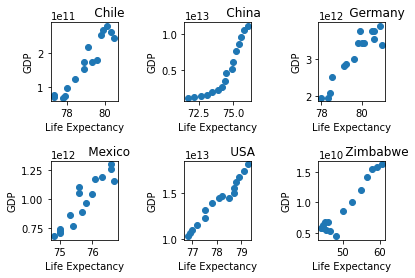

<Figure size 432x288 with 0 Axes>

In [86]:
ax1 = plt.subplot(2,3,1)
ax1.scatter(Chile_df['Life Exp'], Chile_df['GDP'])
ax1.set_xlabel('Life Expectancy')
ax1.set_ylabel('GDP')
ax1.set_title('             Chile')
ax2 = plt.subplot(2,3,2)
ax2.scatter(China_df['Life Exp'], China_df['GDP'])
ax2.set_xlabel('Life Expectancy')
ax2.set_ylabel('GDP')
ax2.set_title('             China')
ax3 = plt.subplot(2,3,3)
ax3.scatter(Germany_df['Life Exp'], Germany_df['GDP'])
ax3.set_xlabel('Life Expectancy')
ax3.set_ylabel('GDP')
ax3.set_title('             Germany')
ax4 = plt.subplot(2,3,4)
ax4.scatter(Mexico_df['Life Exp'], Mexico_df['GDP'])
ax4.set_xlabel('Life Expectancy')
ax4.set_ylabel('GDP')
ax4.set_title('             Mexico')
ax5 = plt.subplot(2,3,5)
ax5.scatter(US_df['Life Exp'], US_df['GDP'])
ax5.set_xlabel('Life Expectancy')
ax5.set_ylabel('GDP')
ax5.set_title('             USA')
ax6 = plt.subplot(2,3,6)
ax6.scatter(Zimbabwe_df['Life Exp'], Zimbabwe_df['GDP'])
ax6.set_xlabel('Life Expectancy')
ax6.set_ylabel('GDP')
ax6.set_title('             Zimbabwe')
plt.subplots_adjust(hspace=.75)
plt.subplots_adjust(wspace=1)
plt.savefig('Country_Side_by_Side.png')
plt.show()
plt.clf()